In [65]:
import numpy as np
import pandas as pd
import tensorflow as tf
import warnings
import seaborn as sns
import matplotlib.pyplot as plt
from collections import Counter

In [66]:
dataset=pd.read_csv('data/bankloan.csv')


In [67]:
dataset.dropna()
dataset.isna().any()
dataset = dataset.drop(['Loan_ID'], axis=1, errors='ignore')
dataset['LoanAmount'] = dataset['LoanAmount'].fillna(0)
dataset['LoanAmount'] = (dataset['LoanAmount'] * 1000).astype(int)
Counter(dataset['Loan_Status'])

Counter({'Y': 422, 'N': 192})

In [68]:
pred_y=dataset['Loan_Status']
pred_x=dataset.drop(['Loan_Status'],axis=1)
dum_X=pd.get_dummies(pred_x) # work as one-hot encoder means convert data 1,0
dum_Y=pred_y.map(dict(Y=1,N=0))
dum_Y

0      1
1      0
2      1
3      1
4      1
      ..
609    1
610    1
611    1
612    1
613    0
Name: Loan_Status, Length: 614, dtype: int64

In [69]:
# from imblearn.over_sampling import SMOTE
dataset['LoanAmount'] = dataset['LoanAmount'].replace(0, dataset['LoanAmount'].median())
dataset.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0.0,Graduate,No,5849,0.0,125000,360.0,1.0,Urban,Y
1,Male,Yes,1.0,Graduate,No,4583,1508.0,128000,360.0,1.0,Rural,N
2,Male,Yes,0.0,Graduate,Yes,3000,0.0,66000,360.0,1.0,Urban,Y
3,Male,Yes,0.0,Not Graduate,No,2583,2358.0,120000,360.0,1.0,Urban,Y
4,Male,No,0.0,Graduate,No,6000,0.0,141000,360.0,1.0,Urban,Y


### data spliting and featuring data

In [70]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler  

X_train,X_test,y_train,y_test=train_test_split(dum_X,dum_Y,test_size=.2,random_state=42)

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [71]:
Counter(y_train)

Counter({1: 342, 0: 149})

### Build a Neural Network with TensorFlow

In [79]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(200, activation='relu', input_shape=(X_train.shape[1],)),
    tf.keras.layers.Dense(400, activation='relu'),
    tf.keras.layers.Dense(10, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Print the model summary
model.summary()

f:\git\bank_loan\env\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_22 (Dense)                │ (None, 200)            │         3,600 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_23 (Dense)                │ (None, 400)            │        80,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_24 (Dense)                │ (None, 10)             │         4,010 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_25 (Dense)                │ (None, 1)              │            11 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 88,021 (343.83 KB)

 Trainable params: 88,021 (343.83 KB)

 Non-trainable params: 0 (0.00 B)

In [80]:
history=model.fit(X_train,y_train,batch_size=32,epochs=50,validation_split=.2,verbose=2)

Epoch 1/50
13/13 - 3s - 230ms/step - accuracy: 0.6964 - loss: 0.6793 - val_accuracy: 0.6970 - val_loss: 0.6673
Epoch 2/50
13/13 - 0s - 10ms/step - accuracy: 0.6964 - loss: 0.6564 - val_accuracy: 0.6970 - val_loss: 0.6384
Epoch 3/50
13/13 - 0s - 11ms/step - accuracy: 0.6964 - loss: 0.6288 - val_accuracy: 0.6970 - val_loss: 0.6182
Epoch 4/50
13/13 - 0s - 12ms/step - accuracy: 0.6964 - loss: 0.6164 - val_accuracy: 0.6970 - val_loss: 0.6134
Epoch 5/50
13/13 - 0s - 23ms/step - accuracy: 0.6964 - loss: 0.6143 - val_accuracy: 0.6970 - val_loss: 0.6136
Epoch 6/50
13/13 - 0s - 10ms/step - accuracy: 0.6964 - loss: 0.6141 - val_accuracy: 0.6970 - val_loss: 0.6135
Epoch 7/50
13/13 - 0s - 10ms/step - accuracy: 0.6964 - loss: 0.6141 - val_accuracy: 0.6970 - val_loss: 0.6135
Epoch 8/50
13/13 - 0s - 10ms/step - accuracy: 0.6964 - loss: 0.6146 - val_accuracy: 0.6970 - val_loss: 0.6136
Epoch 9/50
13/13 - 0s - 10ms/step - accuracy: 0.6964 - loss: 0.6142 - val_accuracy: 0.6970 - val_loss: 0.6134
Epoch 10/

### evalute the model


In [81]:
test_loss, test_accuracy=model.evaluate(X_test,y_test,verbose=2)
y_pred = (model.predict(X_test) > 0.5).astype("int32")
y_pred


4/4 - 0s - 13ms/step - accuracy: 0.6504 - loss: 0.6521
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


array([[1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
    

In [82]:
y_pred=(y_pred>.5)

### Evaluate Model Performance

In [83]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
cm=confusion_matrix(y_test,y_pred)

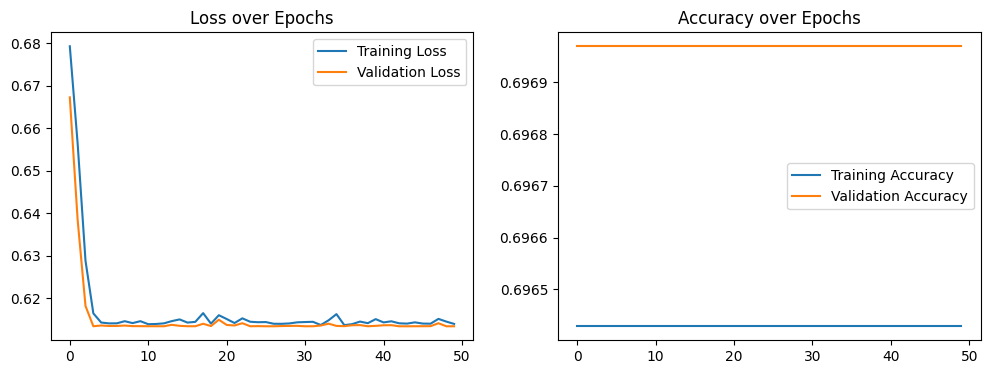

In [84]:
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.title('Loss over Epochs')

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.title('Accuracy over Epochs')

plt.show()


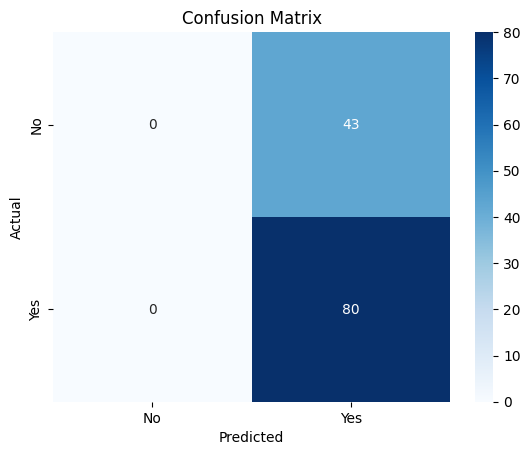

In [85]:
fig, ax = plt.subplots()

# Plot the heatmap
sns.heatmap(cm, annot=True, ax=ax, cmap="Blues", fmt='g')

# Set the labels and title
ax.set_xlabel('Predicted')
ax.set_ylabel('Actual')
ax.set_title('Confusion Matrix')

# Set the tick labels
ax.xaxis.set_ticklabels(['No', 'Yes'])
ax.yaxis.set_ticklabels(['No', 'Yes'])

# Display the plot
plt.show()